# Titanic<sub>An introduction to machine learning <sub>
[Home Page](https://www.kaggle.com/c/titanic)




<img src="https://i0.wp.com/intheboatshed.net/wp-content/uploads/2008/04/titanic_4.jpg" width="800px">

# Preliminaries

## Interesting Links

kaggle intern:
 - https://www.kaggle.com/alexisbcook/titanic-tutorial
 - https://www.kaggle.com/parulpandey/10-simple-hacks-to-speed-up-your-data-analysis#758058
 - https://www.kaggle.com/startupsci/titanic-data-science-solutions
 - https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic
 
 others:
 - https://pandas-profiling.github.io/pandas-profiling/docs/


## Settings

In [1]:
# settings
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
#To revert to the original setting :
# InteractiveShell.ast_node_interactivity = "last_expr"

## Imports

In [2]:
#imports
# os 
import os

# data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd

# visualization and reporting
import pandas_profiling # dataframe profiling @
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# walk file structure and find input data
input_files=[]
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        path=os.path.join(dirname, filename)
        if path.endswith('submission.csv'):
            path_gs=path
        elif path.endswith('test.csv'):
            path_test=path
        elif path.endswith('train.csv'):
            path_train=path
print(path_gs,path_test,path_train)            

kaggle/input\gender_submission.csv kaggle/input\test.csv kaggle/input\train.csv


## DataFrame Creation

In [4]:
# create a dataframe for each csv file
test_df=pd.read_csv(path_test)
train_df=pd.read_csv(path_train)

# display
#test_df.head()
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Report

In [5]:
#profile report inline
#train_df.profile_report(title='Titanic test')

In [6]:
#profile report export
# source : https://pypi.org/project/pandas-profiling/

# #gender sub
# profile_test = df_test.profile_report(title='Titanic test')
# profile_test.to_file(output_file="kaggle/profile_report/Titanic test.html")

# #gender sub
# profile_train = df_train.profile_report(title='Titanic train')
# profile_train.to_file(output_file="kaggle/profile_report/Titanic train.html")

# A simple aproach

## Wrangling

In [7]:
def df_wrangle(df):
    df.loc[df.Sex=='female','Sex_num']=200
    df.loc[df.Sex=='male','Sex_num']=100
    df.loc[df.Age<21,'Age_num']=10
    df.loc[df.Age>=21,'Age_num']=20
    df.loc[df.Age.isna(),'Age_num']=30
    df['crit']=df.Sex_num+df.Pclass+df.Age_num
    df.drop(['Age_num','Sex_num'],axis=1,inplace=True)
    return df

In [8]:
df=train_df
df=df_wrangle(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,crit
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,123.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,221.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,223.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,221.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,123.0


In [9]:
df_surviving_rate=df[['crit','Survived']].groupby('crit',as_index=False).mean()
df_surviving_rate.rename(columns={'Survived':'Surviving_rate'},inplace=True)
df_surviving_rate

,crit,Surviving_rate
0,111.0,0.571429
1,112.0,0.526316
2,113.0,0.194805
3,121.0,0.382979
4,122.0,0.062500
5,123.0,0.130682
6,131.0,0.238095
7,132.0,0.222222
8,133.0,0.095745
9,211.0,0.928571


In [10]:
def surviving_rate(critt):   
    return df_surviving_rate.Surviving_rate.loc[df_surviving_rate.crit==critt].values[0]

 ## apply critt to df_test

In [11]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
test_df=df_wrangle(test_df)
test_df=test_df[['PassengerId','crit']]
test_df.head()

,PassengerId,crit
0,892,123.0
1,893,223.0
2,894,122.0
3,895,123.0
4,896,223.0


## Prediction

In [13]:
test_df.loc[:,'Surviving_rate']=test_df.apply(lambda x: surviving_rate(x['crit']),axis=1)
test_df.loc[:,'Survived']=0
test_df.head()

,PassengerId,crit,Surviving_rate,Survived
0,892,123.0,0.130682,0
1,893,223.0,0.418182,0
2,894,122.0,0.062500,0
3,895,123.0,0.130682,0
4,896,223.0,0.418182,0


In [14]:
val_list={}
for critt in test_df.crit.unique():
    lenght=len(test_df.loc[test_df.crit==critt])
    surv=round(surviving_rate(critt),3)
    val=[1]
    for i in range(lenght-1):     
        if np.mean(val)<=surv:
            val.append(1)
        else:
            val.append(0)
    real_surv=round(np.mean(val),3)        
    val_list[critt]={'length': lenght,
                    'surv':surv,
                    'real_surv':real_surv,
                    'val_list':val}
    #print(critt,lenght,surv,real_surv)
    test_df.loc[test_df.crit==critt,'Survived']=val_list[critt]['val_list']

#val_list[123]['val_list']

## submission

In [15]:
df_export=test_df[['PassengerId','Survived']]
df_export.set_index('PassengerId',inplace=True)
#.drop('index'.inplace=True)
df_export.head()
#df_gs.head()

,Survived
PassengerId,
892,1
893,1
894,1
895,0
896,0


In [16]:
# df_export.to_csv('my_first_submission.csv')

# Machine learning aproache

check : https://www.kaggle.com/startupsci/titanic-data-science-solutions

## create dataframe

In [17]:
train_data=pd.read_csv(path_train)
test_data=pd.read_csv(path_test)
#test_data.head()
#train_data.head()

## wrangling

### Extract Title from Name

In [18]:
def title(df):
    #name
        # extract title
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
        # reduce size
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    return df

In [19]:
test_df=pd.read_csv(path_train)

In [20]:
test_df['Title_exp'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # reduce size
test_df['Title_exp'] = test_df['Title_exp'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title_exp'] = test_df['Title_exp'].replace('Mlle', 'Miss')
test_df['Title_exp'] = test_df['Title_exp'].replace('Ms', 'Miss')
test_df['Title_exp'] = test_df['Title_exp'].replace('Mme', 'Mrs')
test_df=title(test_df)
test_df[['Title','Title_exp', 'Survived']].groupby(['Title','Title_exp'], as_index=False).mean()
print('with:')
print("Rare = ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']")

,Title,Title_exp,Survived
0,Master,Master,0.575000
1,Miss,Miss,0.702703
2,Mr,Mr,0.156673
3,Mrs,Mrs,0.793651
4,Rare,Rare,0.347826


with:
Rare = ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']


In [21]:
test_df.drop('Title_exp',axis=1,inplace=True)

### Convert Sex to Categorical 

In [22]:
def gender(df):
    df['Gender'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    #df.drop('Sex',axis=1,inplace=True)
    return df

In [23]:
test_df=gender(test_df)
test_df.head()
test_df[['Gender', 'Survived']].groupby(['Gender'], as_index=True).mean()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


,Survived
Gender,
0,0.188908
1,0.742038


### Guess missing age and Band

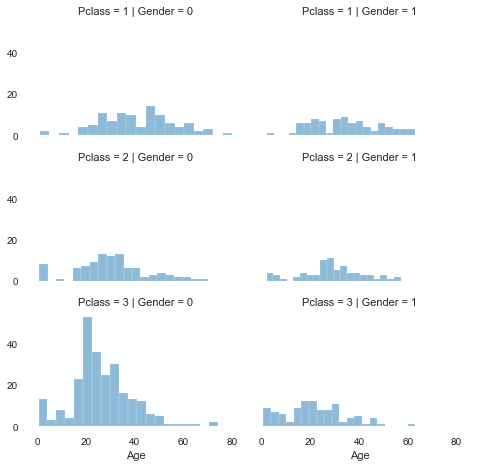

In [24]:
grid = sns.FacetGrid(test_df, row='Pclass', col='Gender', height=2.2, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [25]:
test_df['AgeBand'] = pd.cut(test_df['Age'], 5)
test_df[['AgeBand', 'Survived']].dropna().groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [26]:
test_df.drop('AgeBand',axis=1,inplace=True)

In [27]:
def age(df):
    """ replace non known age with median age regarding Pclass and Sex"""
    
    #init
    guess_ages = np.zeros((2,3))
    
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = df[(df['Gender'] == i) & (df['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df['Pclass'] == j+1),'Age'] = guess_ages[i,j]

    df['Age'] = df['Age'].astype(int)
    
    #show band#
    #df['AgeBand'] = pd.cut(df['Age'], 5)
    #df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
    
    df['Child'] = 'child'
    df.loc[(df['Age']<7),'Child']='infant'
    df.loc[df['Age']>=21,'Child']='adult'
    
    #banding
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age']
    

    
    return df

In [28]:
test_df=age(test_df) 

### Band Fare

In [29]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df['Fare_band'] = pd.cut(test_df['Fare'], 4)
test_df[['Fare_band', 'Survived']].dropna().groupby(['Fare_band'], as_index=False).mean().sort_values(by='Fare_band', ascending=True)

,Fare_band,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [30]:
def fare(df):
    #guess missing value
    df['Fare'].fillna(df['Fare'].dropna().median(), inplace=True)
    #banding
    df.loc[ df['Fare'] <= 50, 'Fare'] = 0
    df.loc[(df['Fare'] > 50) & (df['Fare'] <= 100), 'Fare'] = 1
    df.loc[(df['Fare'] > 100) & (df['Fare'] <= 200), 'Fare'] = 2
    df.loc[ df['Fare'] > 200, 'Fare']=3
    df['Fare'] = df['Fare'].astype(int)
    return df    

In [31]:
test_df=fare(test_df) 
test_df.drop('Fare_band',axis=1,inplace=True)

### Convert Sib and Parch to Alone

In [32]:
def familysize(df):  
    df['Familysize'] = df.SibSp + df.Parch + 1   
    df.drop(['SibSp','Parch'],axis=True,inplace=True)
    return df


In [33]:
test_df=familysize(test_df)
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Gender,Child,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,1,A/5 21171,0,NaN,S,Mr,0,adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,PC 17599,1,C85,C,Mrs,1,adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,1,STON/O2. 3101282,0,NaN,S,Miss,1,adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,113803,1,C123,S,Mrs,1,adult,2
4,5,0,3,"Allen, Mr. William Henry",male,2,373450,0,NaN,S,Mr,0,adult,1


### Band Embarked

In [34]:
def embarked(df):
    #guess missing value
    df['Embarked'].fillna('C', inplace=True) # faire price correspond to 80 and 1 Pclass
    return df    

In [35]:
test_df=embarked(test_df)
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Gender,Child,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,1,A/5 21171,0,NaN,S,Mr,0,adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,PC 17599,1,C85,C,Mrs,1,adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,1,STON/O2. 3101282,0,NaN,S,Miss,1,adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,113803,1,C123,S,Mrs,1,adult,2
4,5,0,3,"Allen, Mr. William Henry",male,2,373450,0,NaN,S,Mr,0,adult,1


### add artificial feature to bring an emphasis

In [36]:
def emphasis(df):
    #class*age
    df["class*age"]=df["Pclass"] * df["Age"]
    return df    

In [37]:
test_df=emphasis(test_df)
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Gender,Child,Familysize,class*age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,A/5 21171,0,NaN,S,Mr,0,adult,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,PC 17599,1,C85,C,Mrs,1,adult,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,1,STON/O2. 3101282,0,NaN,S,Miss,1,adult,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,113803,1,C123,S,Mrs,1,adult,2,2
4,5,0,3,"Allen, Mr. William Henry",male,2,373450,0,NaN,S,Mr,0,adult,1,6


### Wrangle

In [38]:
def df_wrangle(df):
    #name
    df=title(df)
    
    #sex
    df=gender(df)
    
    #age
    df=age(df)

    #Fare
    df=fare(df)
    
    #Family
    df=familysize(df)
    
    #Embarked
    df=embarked(df)
    
    #emphasis
    df=emphasis(df)
    
    #remove unsafe and unnecessary
    df.drop(['Ticket','Cabin'],axis=True, inplace=True)
    return df



In [39]:
train_data=df_wrangle(train_data)
test_data=df_wrangle(test_data)

In [40]:
train_data.head()
test_data.head()

array(['adult', 'infant', 'child'], dtype=object)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Title,Gender,Child,Familysize,class*age
0,892,3,"Kelly, Mr. James",male,2,0,Q,Mr,0,adult,1,6
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2,0,S,Mrs,1,adult,2,6
2,894,2,"Myles, Mr. Thomas Francis",male,3,0,Q,Mr,0,adult,1,6
3,895,3,"Wirz, Mr. Albert",male,1,0,S,Mr,0,adult,1,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,0,S,Mrs,1,adult,3,3


In [41]:
#report output
#profile_train_ml = train_data.profile_report(title='Titanic train')
#profile_test_ml = test_data.profile_report(title='Titanic test')
#profile_train_ml.to_file(output_file="kaggle/profile_report/Titanic_train_ml_report.html")
#profile_train_ml

## Machine learning

### RandomForestClassifier

In [42]:
Y_train  = train_data["Survived"]
features = ["Pclass", "Age", "Sex", "Fare","Embarked","Familysize","Title","class*age","Child"]
X_train  = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [44]:
#RFC
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
#Score
round(model.score(X_train, Y_train)*100,2)

87.88

,importance
feature,
Title,23.601667
Sex,23.319394
Familysize,15.546283
Pclass,10.295829
class*age,7.544141
Fare,5.746311
Embarked,5.673438
Age,4.379365
Child,3.893571


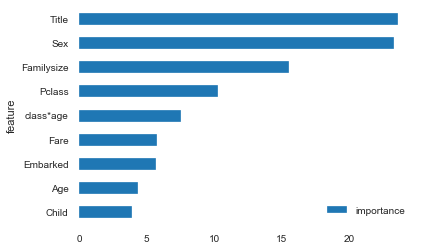

In [46]:
# importance
variable_importance = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_*100})
variable_importance['feature']=variable_importance['feature'].str.split("_", n = 1, expand = True) 
variable_importance=variable_importance.groupby('feature',as_index=True).sum().sort_values(by='importance', ascending=True)
variable_importance.plot.barh()
variable_importance.sort_values(by='importance', ascending=False)

## Submit

In [51]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
#output.set_index('PassengerId',inplace=True)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [52]:
output.to_csv('my_ml_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
